## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Checking the number of mice.
num_of_mice = combined_data["Mouse ID"].count()
print(num_of_mice)

1893


In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id_num = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]
print(duplicate_id_num)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [21]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe = clean_mouse_data["Mouse ID"].count()
print(clean_dataframe)

1888


## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
reg_unique = clean_mouse_data["Drug Regimen"].unique().tolist()
reg_unique


['Ramicane',
 'Capomulin',
 'Infubinol',
 'Placebo',
 'Ceftamin',
 'Stelasyn',
 'Zoniferol',
 'Ketapril',
 'Propriva',
 'Naftisol']

In [23]:

reg_summary=pd.DataFrame(clean_mouse_data.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": [np.size, np.mean, np.median, np.var, np.std, st.sem]}).reset_index())
reg_summary.columns = ['Drug','Count', 'Mean', 'Median', 'Var', 'Std', 'SEM']
reg_summary = reg_summary.reset_index()
reg_summary

C:\Users\muzai\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\muzai\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\muzai\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,index,Drug,Count,Mean,Median,Var,Std,SEM
0,0,Capomulin,230.0,40.675741,41.557809,24.947764,4.994774,0.329346
1,1,Ceftamin,178.0,52.591172,51.776157,39.290177,6.268188,0.469821
2,2,Infubinol,178.0,52.884795,51.820584,43.128684,6.567243,0.492236
3,3,Ketapril,188.0,55.235638,53.698743,68.553577,8.279709,0.603860
4,4,Naftisol,186.0,54.331565,52.509285,66.173479,8.134708,0.596466
5,5,Placebo,181.0,54.033581,52.288934,61.168083,7.821003,0.581331
6,6,Propriva,156.0,52.393463,50.909965,43.138803,6.568014,0.525862
7,7,Ramicane,228.0,40.216745,40.673236,23.486704,4.846308,0.320955
8,8,Stelasyn,181.0,54.233149,52.431737,59.450562,7.710419,0.573111
9,9,Zoniferol,182.0,53.236507,51.818479,48.533355,6.966589,0.516398


In [24]:
reg_summary.dtypes


index       int64
Drug       object
Count     float64
Mean      float64
Median    float64
Var       float64
Std       float64
SEM       float64
dtype: object

## Bar and Pie Charts

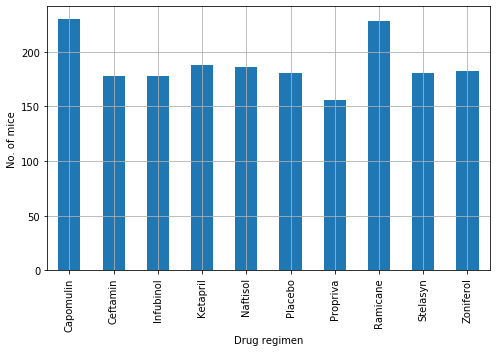

In [29]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Bar_plot= reg_summary.plot.bar(x="Drug", y="Count", figsize=(7, 5))
plt.grid()
Bar_plot.get_legend().remove()
plt.ylabel("No. of mice")
plt.xlabel("Drug regimen")
plt.tight_layout()


In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


In [31]:
reg_count=reg_summary["Count"].tolist()
reg_count

[230.0, 178.0, 178.0, 188.0, 186.0, 181.0, 156.0, 228.0, 181.0, 182.0]

In [32]:
reg_list=reg_summary["Drug"].tolist()
reg_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

Text(0.5, 1.0, 'Number of mice per drug')

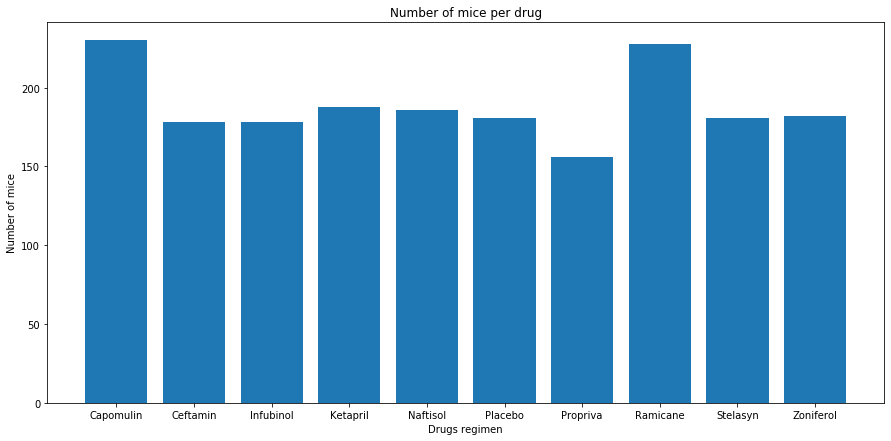

In [38]:
plt.figure(figsize=(15,7))
plt.bar(reg_list, reg_count, align='center')
plt.xlabel("Drugs regimen")
plt.ylabel("Number of mice")
plt.title("Number of mice per drug")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [39]:
gender_summary=pd.DataFrame(clean_mouse_data.groupby(["Sex"]).agg({"Mouse ID": [np.size]}).reset_index())
gender_summary.columns = ['Sex','Count']
gender_summary= gender_summary.reset_index()
gender_summary.Count = gender_summary.Count.astype(int)
gender_summary

,index,Sex,Count
0,0,Female,930
1,1,Male,958


In [42]:
gender_list=gender_summary['Sex'].tolist()
gender_list

['Female', 'Male']

In [43]:
gender_count=gender_summary['Count'].tolist()
gender_count

[930, 958]

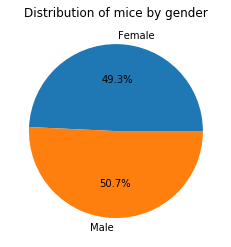

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=gender_list, autopct='%.1f%%')
plt.title("Distribution of mice by gender")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

maximum_timepoint=pd.DataFrame(clean_mouse_data.groupby(["Mouse ID"]).
                      agg({"Timepoint": "max"}).reset_index())
maximum_timepoint.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [50]:
maximum_timepoint["Mouse ID"].count()

249

In [52]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maximum_time=pd.merge(maximum_timepoint, clean_mouse_data, how="left", left_on=['Mouse ID','Timepoint'], right_on = ['Mouse ID','Timepoint'])
maximum_time["Mouse ID"].count()

249

In [53]:
maximum_time.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [54]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_treatment_timepoint = clean_mouse_data.loc[clean_mouse_data["Mouse ID"]=="s185", ["Timepoint"]]
Capomulin_tumor = clean_mouse_data.loc[clean_mouse_data["Mouse ID"]=="s185", ["Tumor Volume (mm3)"]]
Capomulin_tumor
Capomulin_treatment_timepoint

,Timepoint
10,0
11,5
12,10
13,15
14,20
15,25
16,30
17,35
18,40
19,45


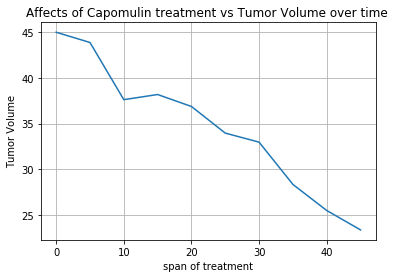

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.plot(Capomulin_treatment_timepoint, Capomulin_tumor)
plt.xlabel("span of treatment")
plt.ylabel("Tumor Volume")
plt.title("Affects of Capomulin treatment vs Tumor Volume over time ")
plt.grid()
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
